Import Required Libraries

In [70]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Download necessary NLTK data (like stopwords)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load the Dataset

In [72]:
# Load dataset (CSV or your own dataset)
df = pd.read_csv(r"C:\Users\amala\Downloads\spam.csv", encoding='latin-1')  # Adjust path and encoding if needed
df = df[['v1', 'v2']]  # Select only the necessary columns
df.columns = ['Label', 'Message']  # Rename columns for clarity
df

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Preprocess the Text Data

In [73]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the text into words
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    stop_words = set(stopwords.words('english'))  # Load stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)  # Rejoin tokens into a cleaned string

# Apply preprocessing to the dataset
df['Message'] = df['Message'].apply(preprocess_text)


 Split the Data into Training and Test Sets

In [74]:
# Split data into features (X) and target (y)
X = df['Message']
y = df['Label']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Convert Text Data to Feature Vectors

In [75]:
# Convert text into feature vectors
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


 Train the Naive Bayes Classifier

In [76]:
# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vect, y_train)


MultinomialNB()

 Evaluate the Model

Accuracy: 97.13%
[[953  12]
 [ 20 130]]
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       965
        spam       0.92      0.87      0.89       150

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



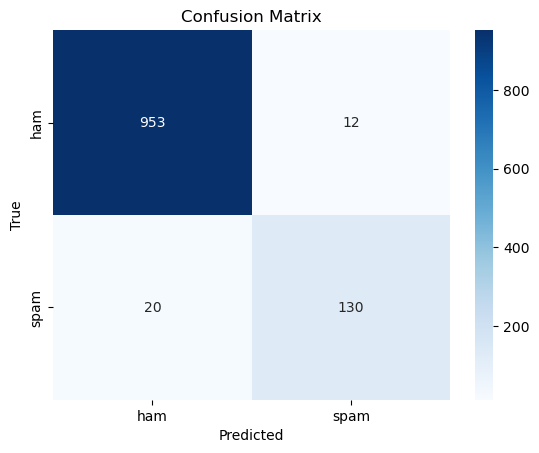

In [77]:
# Make predictions on the test set
y_pred = model.predict(X_test_vect)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Show confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optional: Plot confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Test with New Messages

In [79]:
# Function to predict spam or ham
def predict_spam(message):
    message = preprocess_text(message)
    message_vect = vectorizer.transform([message])
    prediction = model.predict(message_vect)
    return prediction[0]

# Test with new messages
print(predict_spam("Congratulations! You've won a free iPhone! Click here to claim your prize."))
print(predict_spam("Let's grab lunch today!"))


spam
ham
